<a href="https://colab.research.google.com/github/shreyasaathreya/shreyasaathreya/blob/main/smart_watch_analysis_shreyas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the CSV files into DataFrames
activity_data = pd.read_csv('activity_data.csv')
activity_heartrate = pd.read_csv('activity_data_heartrate.csv')
sleep_data = pd.read_csv('sleep_data.csv')

In [ ]:
print(activity_data.head())
print(activity_heartrate.head())
print(sleep_data.head())

           Id        Date  TotalSteps  TotalDistance  SedentaryMinutes  \
0  6117666160  2016-04-21       19542      15.010000               579   
1  5577150313  2016-04-17       12231       9.140000               525   
2  8877689391  2016-04-16       29326      25.290001               888   
3  5577150313  2016-05-01       13368       9.990000               499   
4  5577150313  2016-04-30       12363       9.240000               621   

   TotalActiveMinutes  Calories  
0                 324      4900  
1                 396      4552  
2                 552      4547  
3                 444      4546  
4                 415      4501  
           Id        Date  TotalSteps  TotalDistance  TotalActiveMinutes  \
0  4558609924  2016-04-12        5135           3.39                 318   
1  4558609924  2016-04-14        6799           4.49                 279   
2  4558609924  2016-04-20        4803           3.17                 222   
3  4558609924  2016-04-24        8563          

In [ ]:
merged_df = pd.merge(activity_data, activity_heartrate, on='Id')
merged_df = pd.merge(merged_df, sleep_data, on='Id')

In [ ]:
print(merged_df.head())

           Id      Date_x  TotalSteps_x  TotalDistance_x  SedentaryMinutes  \
0  6117666160  2016-04-21         19542            15.01               579   
1  6117666160  2016-04-21         19542            15.01               579   
2  6117666160  2016-04-21         19542            15.01               579   
3  6117666160  2016-04-21         19542            15.01               579   
4  6117666160  2016-04-21         19542            15.01               579   

   TotalActiveMinutes_x  Calories_x      Date_y  TotalSteps_y  \
0                   324        4900  2016-04-17          7150   
1                   324        4900  2016-04-17          7150   
2                   324        4900  2016-04-17          7150   
3                   324        4900  2016-04-17          7150   
4                   324        4900  2016-04-17          7150   

   TotalDistance_y  TotalActiveMinutes_y  Heart_rate  Calories_y        Date  \
0              5.4                   312   85.353022        

In [ ]:
missing_values = merged_df.isnull().sum()

missing_values

Id                      0
Date_x                  0
TotalSteps_x            0
TotalDistance_x         0
SedentaryMinutes        0
TotalActiveMinutes_x    0
Calories_x              0
Date_y                  0
TotalSteps_y            0
TotalDistance_y         0
TotalActiveMinutes_y    0
Heart_rate              0
Calories_y              0
Date                    0
TotalMinutesAsleep      0
TotalTimeInBed          0
dtype: int64

In [ ]:
merged_df['Date_x'] = pd.to_datetime(merged_df['Date_x'])
merged_df['Date_y'] = pd.to_datetime(merged_df['Date_y'])
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

In [ ]:
merged_df.set_index('Date', inplace=True)

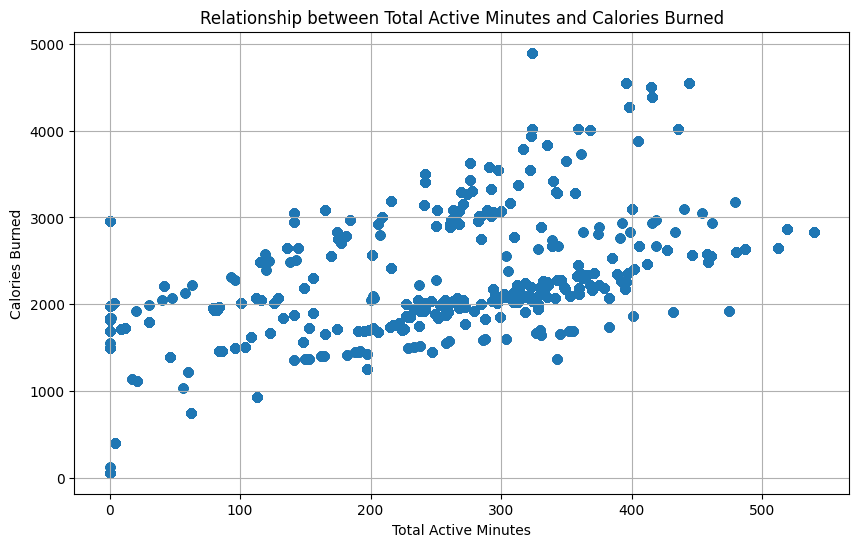

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(merged_df['TotalActiveMinutes_x'], merged_df['Calories_x'], alpha=0.5)
plt.xlabel('Total Active Minutes')
plt.ylabel('Calories Burned')
plt.title('Relationship between Total Active Minutes and Calories Burned')
plt.grid(True)
plt.show()


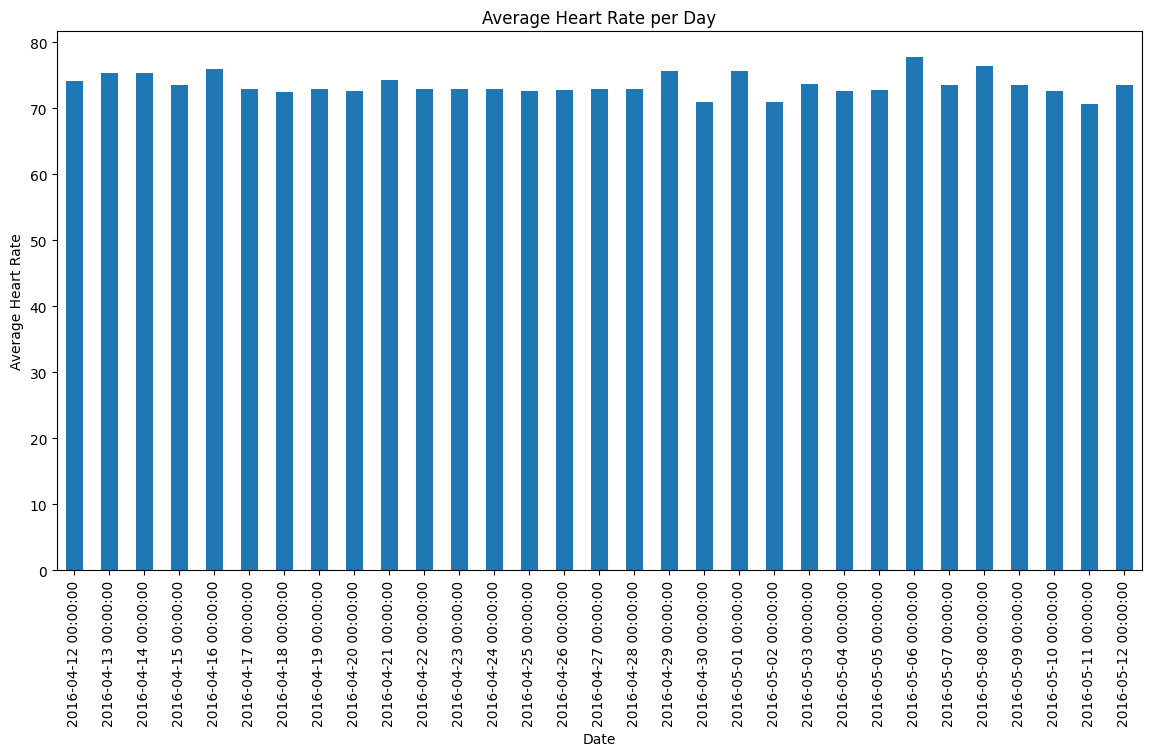

In [ ]:

average_heart_rate = merged_df.groupby('Date')['Heart_rate'].mean()

plt.figure(figsize=(14, 7))
average_heart_rate.plot(kind='bar')
plt.xlabel('Date')
plt.ylabel('Average Heart Rate')
plt.title('Average Heart Rate per Day')
plt.show()



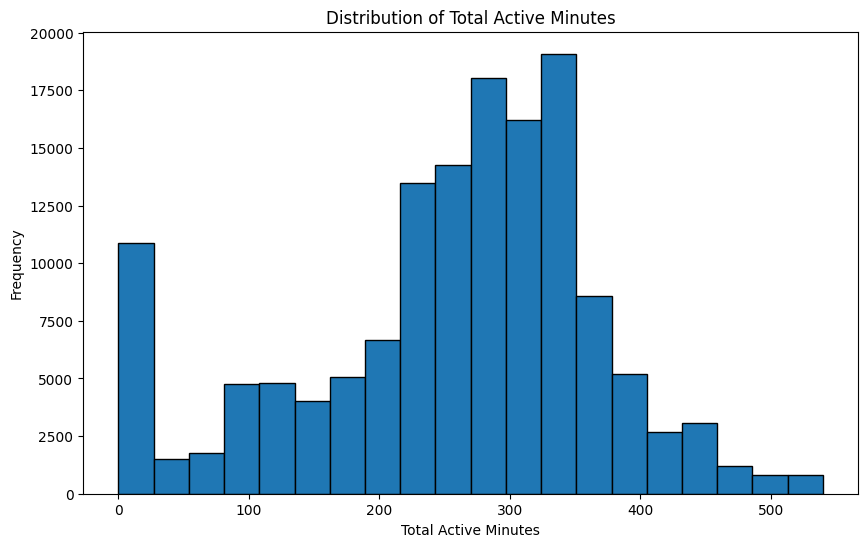

In [ ]:

plt.figure(figsize=(10, 6))
plt.hist(merged_df['TotalActiveMinutes_x'], bins=20, edgecolor='k')
plt.xlabel('Total Active Minutes')
plt.ylabel('Frequency')
plt.title('Distribution of Total Active Minutes')
plt.show()


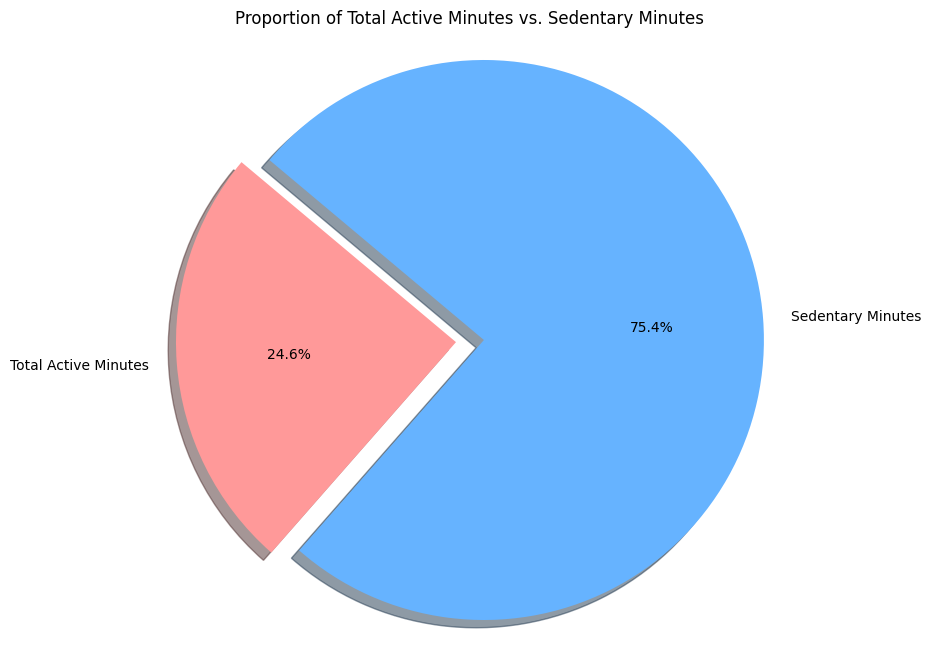

In [ ]:
#SedentaryMinutes is inactive time period the person spends
total_active_minutes = merged_df['TotalActiveMinutes_x'].sum()
sedentary_minutes = merged_df['SedentaryMinutes'].sum()
labels = ['Total Active Minutes', 'Sedentary Minutes']
sizes = [total_active_minutes, sedentary_minutes]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)


plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Proportion of Total Active Minutes vs. Sedentary Minutes')
plt.axis('equal')
plt.show()



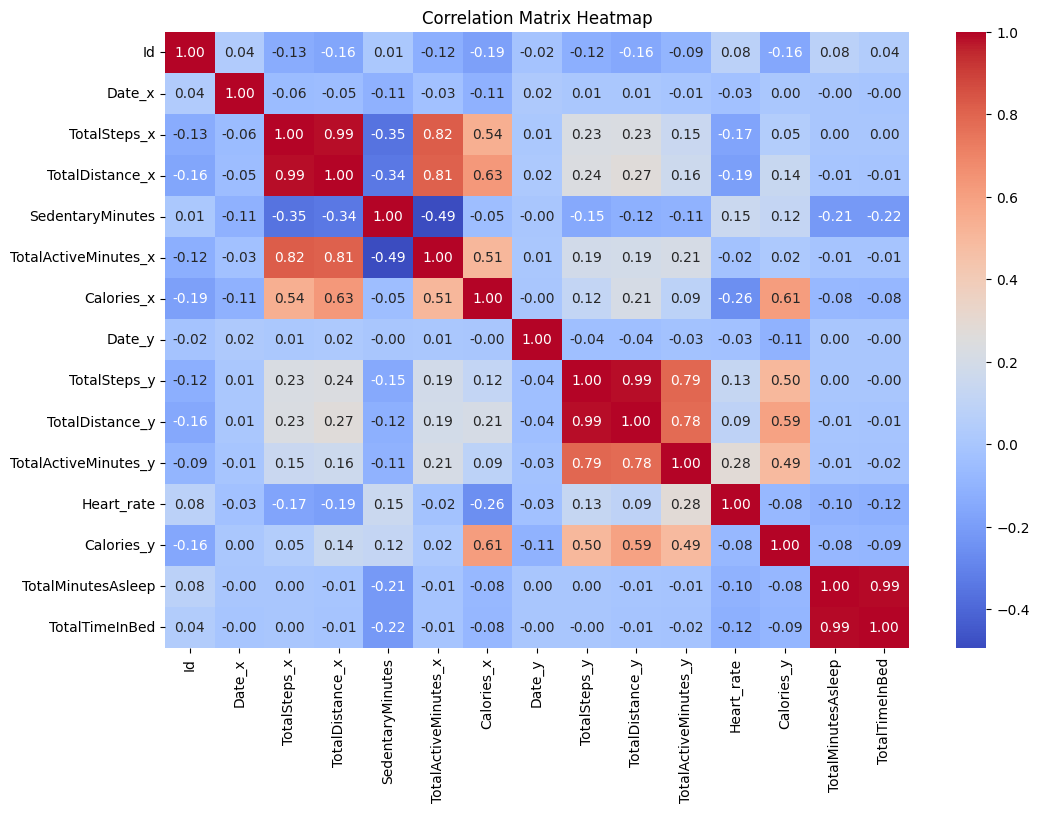

In [28]:
import seaborn as sns

# Calculate correlation matrix
corr_matrix = merged_df.corr()


plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()
